In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Users\\pares\\Downloads\\ds_questions\\ds_questions\\massandopolis')
os.getcwd()

'C:\\Users\\pares\\Downloads\\ds_questions\\ds_questions\\massandopolis'

In [3]:
#what's my data?
all_files = glob.glob('*.csv')
all_files

['allergies.csv',
 'careplans.csv',
 'concepts.csv',
 'conditions.csv',
 'conditions_updated.csv',
 'encounters.csv',
 'imaging_studies.csv',
 'immunizations.csv',
 'medications.csv',
 'observations.csv',
 'organizations.csv',
 'patients.csv',
 'patients_updated.csv',
 'procedures.csv',
 'providers.csv']

This part of analysis, we'll analyze if the people of Massandapolis had medical access. For this, we'll try to determine if there were enough healthcare centers nearby, and were they being treated for the conditions they were suffering from.

- We'll look at medications, organizations and careplans data to assess this.

In [4]:
#loading previous files
condition_categorized = np.load('condition_categories.npy',allow_pickle = 'TRUE').item()

In [5]:
medications = pd.read_csv('medications.csv')
medications.columns = [i.lower() for i in medications]
medications.start = medications.start.apply(pd.to_datetime)
medications.stop = medications.stop.apply(pd.to_datetime)
medications.head()

,start,stop,patient,encounter,code,description,dispenses,reasoncode,reasondescription
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,312617,predniSONE 5 MG Oral Tablet,1,NaN,NaN
1,2013-12-20,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,4fa6e02b-272c-4469-8ef6-814ac1fab7ce,997488,Fexofenadine hydrochloride 30 MG Oral Tablet,65,NaN,NaN
2,2013-12-20,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,4fa6e02b-272c-4469-8ef6-814ac1fab7ce,1870230,NDA020800 0.3 ML Epinephrine 1 MG/ML Auto-Inje...,65,NaN,NaN
3,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,313782,Acetaminophen 325 MG Oral Tablet,1,10509002.0,Acute bronchitis (disorder)
4,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,895994,120 ACTUAT Fluticasone propionate 0.044 MG/ACT...,51,233678006.0,Childhood asthma


In [118]:
conditions = pd.read_csv('conditions_updated.csv')
conditions.columns = [i.lower() for i in conditions.columns]
conditions.start = conditions.start.apply(pd.to_datetime)
conditions.stop = conditions.stop.apply(pd.to_datetime)
conditions.head()

,start,stop,patient,encounter,code,description,condition_category
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,241929008,Acute allergic reaction,Others
1,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,10509002,Acute bronchitis (disorder),Lower Respiratory Tract
2,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,12b7aa28-f443-4ab1-87aa-0509a4e8a1bf,232353008,Perennial allergic rhinitis with seasonal vari...,Upper Respiratory Tract
3,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,233678006,Childhood asthma,Lower Respiratory Tract
4,2016-02-11,2016-02-18,c0d528b6-cdae-4d98-8936-a270f8827eb7,e19abba9-95fd-4071-ad5f-7efec4123b99,10509002,Acute bronchitis (disorder),Lower Respiratory Tract


In [119]:
#matching the medications with the conditions
treatment = pd.merge(conditions,medications,how = 'outer',left_on = ['patient','encounter','start','stop'],right_on = ['patient','encounter','start','stop'])
treatment = treatment[['start','stop','patient','encounter','description_x','description_y','reasondescription']]
treatment.columns = ['start','stop','patient','encounter','condition_description','medicine','medicine_reason']
treatment.info()
treatment.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207362 entries, 0 to 207361
Data columns (total 7 columns):
start                    207362 non-null datetime64[ns]
stop                     147581 non-null datetime64[ns]
patient                  207362 non-null object
encounter                207362 non-null object
condition_description    113541 non-null object
medicine                 127417 non-null object
medicine_reason          80795 non-null object
dtypes: datetime64[ns](2), object(5)
memory usage: 12.7+ MB


,start,stop,patient,encounter,condition_description,medicine,medicine_reason
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,Acute allergic reaction,predniSONE 5 MG Oral Tablet,NaN
1,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,Acute bronchitis (disorder),Acetaminophen 325 MG Oral Tablet,Acute bronchitis (disorder)
2,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,12b7aa28-f443-4ab1-87aa-0509a4e8a1bf,Perennial allergic rhinitis with seasonal vari...,NaN,NaN
3,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,Childhood asthma,120 ACTUAT Fluticasone propionate 0.044 MG/ACT...,Childhood asthma
4,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,Childhood asthma,200 ACTUAT Albuterol 0.09 MG/ACTUAT Metered Do...,Childhood asthma


We have a lot of missing missing condition/reasons for each medicine and encounters. Lets work on determining the missing diseases.

In [120]:
#determining missing conditions - where medicine reason is given, we dont need to do anything. I have taken the condition 
#desciption as the condition where medicine reason is missing
treatment['condition'] = treatment.medicine_reason
ind = treatment.loc[(treatment.condition_description.notnull()) & (treatment.medicine_reason.isnull())].index
treatment.loc[treatment.index.isin(ind),'condition'] = treatment.loc[treatment.index.isin(ind),'condition_description']
treatment.drop(columns = ['condition_description','medicine_reason'],inplace = True)
treatment.head()

,start,stop,patient,encounter,medicine,condition
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,predniSONE 5 MG Oral Tablet,Acute allergic reaction
1,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,Acetaminophen 325 MG Oral Tablet,Acute bronchitis (disorder)
2,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,12b7aa28-f443-4ab1-87aa-0509a4e8a1bf,NaN,Perennial allergic rhinitis with seasonal vari...
3,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,120 ACTUAT Fluticasone propionate 0.044 MG/ACT...,Childhood asthma
4,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,200 ACTUAT Albuterol 0.09 MG/ACTUAT Metered Do...,Childhood asthma


In [121]:
#We still have a lot of missing conditions. Lets look at them in more detail
len(treatment.loc[(treatment.condition.isnull())])

31234

In [122]:
treatment.loc[(treatment.condition.isnull()) & (treatment.medicine.isnull()) ]

,start,stop,patient,encounter,medicine,condition


Point to note -  We have the medicine names at all places where we have missing conditions. Lets use google and other observations to determine the usage of each of these medicines, and then determine condition category (if not, the condition)

In [123]:
#Now, we have are down to observations where we know patient took a medicine, but dont know for what conditon/illness.
#I'm gonna reduce this list further down from domain knowledge
lst = treatment.loc[treatment.condition.isnull(),'medicine'].value_counts().index.to_list()
len(lst)

84

We have 84 such medicines. Lets categorize them.

In [124]:
pregnancy = ['Jolivette 28 Day Pack','Camila 28 Day Pack','Errin 28 Day Pack','Estrostep Fe 28 Day Pack','Norinyl 1+50 28 Day Pack','Mirena 52 MG Intrauterine System',
                         'Ortho Tri-Cyclen 28 Day Pack','Etonogestrel 68 MG Drug Implant','Mestranol / Norethynodrel [Enovid]',
                      'NuvaRing 0.12/0.015 MG per 24HR 21 Day Vaginal Ring','Levonorgestrel 0.00354 MG/HR Drug Implant',
                        'Trinessa 28 Day Pack','Yaz 28 Day Pack','Seasonique 91 Day Pack','Levora 0.15/30 28 Day Pack',
             'Natazia 28 Day Pack','Kyleena 19.5 MG Intrauterine System','Liletta 52 MG Intrauterine System',
             '1 ML medroxyprogesterone acetate 150 MG/ML Injection','168 HR Ethinyl Estradiol 0.00146 MG/HR / norelgestromin 0.00625 MG/HR Transdermal System',
             '0.65 ML medroxyprogesterone acetate 160 MG/ML Prefilled Syringe'
                     ]
seizures = ['Clonazepam [Klonopin]','Carbamazepine[Tegretol]','Diazepam [Valium]']
lifestyle = ['Vitamin B 12 5 MG/ML Injectable Solution','Atorvastatin 80 MG Oral Tablet']
cardiovascular = ['Nitroglycerin 0.4 MG/ACTUAT Mucosal Spray','Amlodipine 5 MG Oral Tablet','Simvastatin 20 MG Oral Tablet',
                 'Verapamil Hydrochloride 40 MG','Clopidogrel 75 MG Oral Tablet','Alteplase 100 MG Injection',
                 '3 ML Amiodarone hydrocholoride 50 MG/ML Prefilled Syringe']
addiction = ['24hr nicotine transdermal patch']
uti = ['2 ML Ondansetron 2 MG/ML Injection','Piperacillin 4000 MG / tazobactam 500 MG Injection','Midazolam 1 MG/ML Injectable Solution',
      'heparin sodium  porcine','Rocuronium bromide 10 MG/ML Injectable Solution','100 ML Propofol 10 MG/ML Injection','Remifentanil',
      'Isoflurane 999 MG/ML Inhalant Solution','Alfentanil','sevoflurane 1000 MG/ML Inhalant Solution']
allergy = ['predniSONE 5 MG Oral Tablet']
arthritis = ['Alendronic acid 10 MG Oral Tablet']

In [125]:
84-(len(pregnancy) + len(seizures) + len(lifestyle) + len(cardiovascular) + len(addiction) + len(uti) + len(allergy) + len(arthritis))

38

We have been able to reduce the 84 figure to 38. The remaining medicines are mostly pain killers, therefore, the conditions are hard to determine using them. Lets use what we got, and move forward with the analysis.

In [126]:
treatment['condition_category'] = treatment.condition.map(condition_categorized)

In [127]:
#mapping the missing conditions
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(pregnancy)),'condition_category'] = 'Pregnancy'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(seizures)),'condition_category'] = 'Brain Damage'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(lifestyle)),'condition_category'] = 'Lifestyle Diseases'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(cardiovascular)),'condition_category'] = 'Cardiovascular diseases'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(addiction)),'condition_category'] = 'Addiction'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(uti)),'condition_category'] = 'Urinary Tract Infection'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(allergy)),'condition_category'] = 'Others'
treatment.loc[(treatment.condition_category.isnull()) & (treatment.medicine.isin(arthritis)),'condition_category'] = 'Arthritis'

In [128]:
treatment.head()

,start,stop,patient,encounter,medicine,condition,condition_category
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,predniSONE 5 MG Oral Tablet,Acute allergic reaction,Others
1,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,Acetaminophen 325 MG Oral Tablet,Acute bronchitis (disorder),Lower Respiratory Tract
2,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,12b7aa28-f443-4ab1-87aa-0509a4e8a1bf,NaN,Perennial allergic rhinitis with seasonal vari...,Upper Respiratory Tract
3,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,120 ACTUAT Fluticasone propionate 0.044 MG/ACT...,Childhood asthma,Lower Respiratory Tract
4,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,200 ACTUAT Albuterol 0.09 MG/ACTUAT Metered Do...,Childhood asthma,Lower Respiratory Tract


- Now that we have compiled and aggregated our data, its time to extract a few insights from it. In the above set, it would be safe to assume, patients with missing values in medicine did not take any medicine for their conditions. Therefore, we can use this to determine the ratio of patients who were treating their illnesses vs who weren't. And then I'd like to compare that with people who are still alive vs who now have passed away.

- This would help us understand whether patients who died, did so due to lack of medications.

In [129]:
treatment['medicated'] = 'no'
treatment.loc[treatment.medicine.notnull(),'medicated'] = 'yes'

In [130]:
treatment.head()

,start,stop,patient,encounter,medicine,condition,condition_category,medicated
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,predniSONE 5 MG Oral Tablet,Acute allergic reaction,Others,yes
1,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,Acetaminophen 325 MG Oral Tablet,Acute bronchitis (disorder),Lower Respiratory Tract,yes
2,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,12b7aa28-f443-4ab1-87aa-0509a4e8a1bf,NaN,Perennial allergic rhinitis with seasonal vari...,Upper Respiratory Tract,no
3,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,120 ACTUAT Fluticasone propionate 0.044 MG/ACT...,Childhood asthma,Lower Respiratory Tract,yes
4,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,200 ACTUAT Albuterol 0.09 MG/ACTUAT Metered Do...,Childhood asthma,Lower Respiratory Tract,yes


In [131]:
all_categories = treatment.condition_category.value_counts().index
all_categories

Index(['Lifestyle Diseases', 'Upper Respiratory Tract', 'Chronic Pain',
       'Lower Respiratory Tract', 'Pregnancy', 'Wounds and Injuries',
       'Cardiovascular diseases', 'Brain Damage', 'Urinary Tract Infection',
       'Addiction', 'Digestive Tract', 'Dental', 'Arthritis', 'Others',
       'Mental Health', 'Hereditary Diseases'],
      dtype='object')

Lets look at each condition individually!

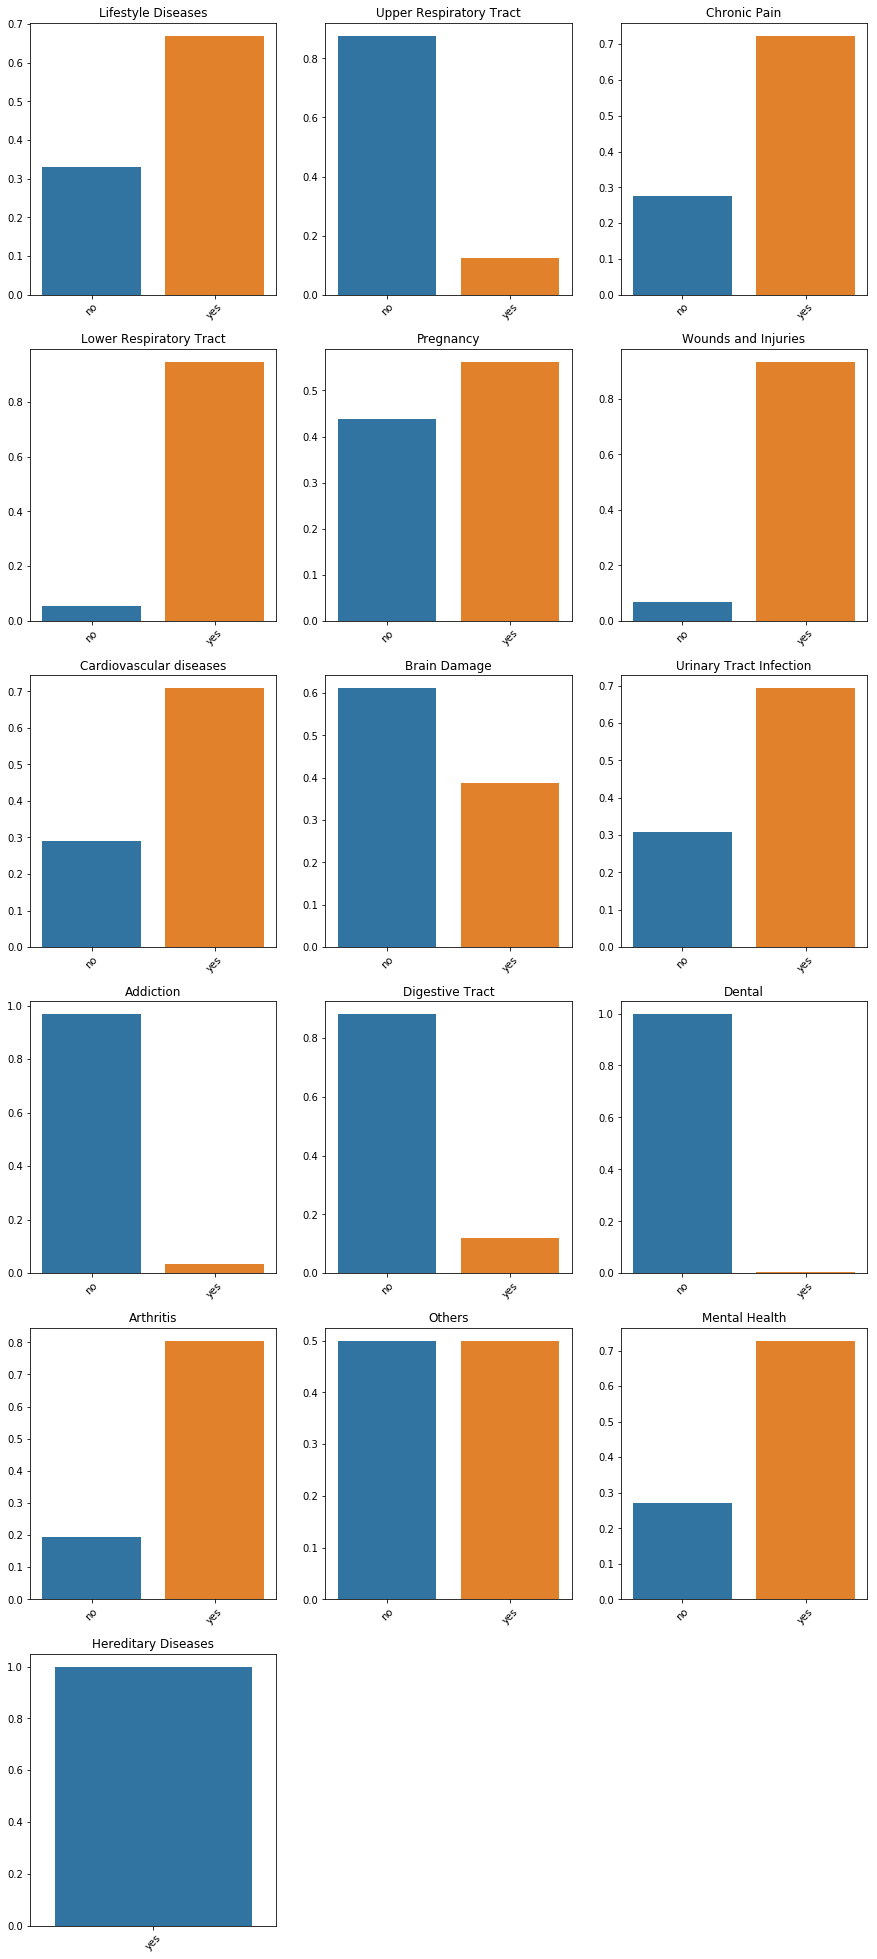

In [136]:
fig,ax = plt.subplots(6,3,figsize = (15,35))
ax = [y for x in ax for y in x]
fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
for i in range(len(all_categories)):
    data = treatment.loc[treatment.condition_category == all_categories[i]]
    counts = data.medicated.value_counts(normalize = True).sort_index()
    sns.barplot(x = counts.index,y=counts.values,ax = ax[i])
    ax[i].set_title(all_categories[i])
    
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()
    

#### Note: I assume patients with a missing medicine means they are not on any medication

- Wow. There are a lot of un-medicated patients. What grabs my attention are the patients with  Upper Respiratory Tract, Digestive Tract, Addiction and Dental issues. These are diseases with a very high un-medicated to medicated ratio.
- Other diseases like pregnancy, brain damage also have quite a high number of un-medicated patients.

- Lets understand does the issue of lack of medication is affecting any particular group.
 

In [143]:
patients = pd.read_csv('patients_updated.csv')

In [144]:
treatment_w_groups = pd.merge(treatment,patients[['id','race','ethnicity']],how = 'left',left_on = 'patient',right_on = 'id')

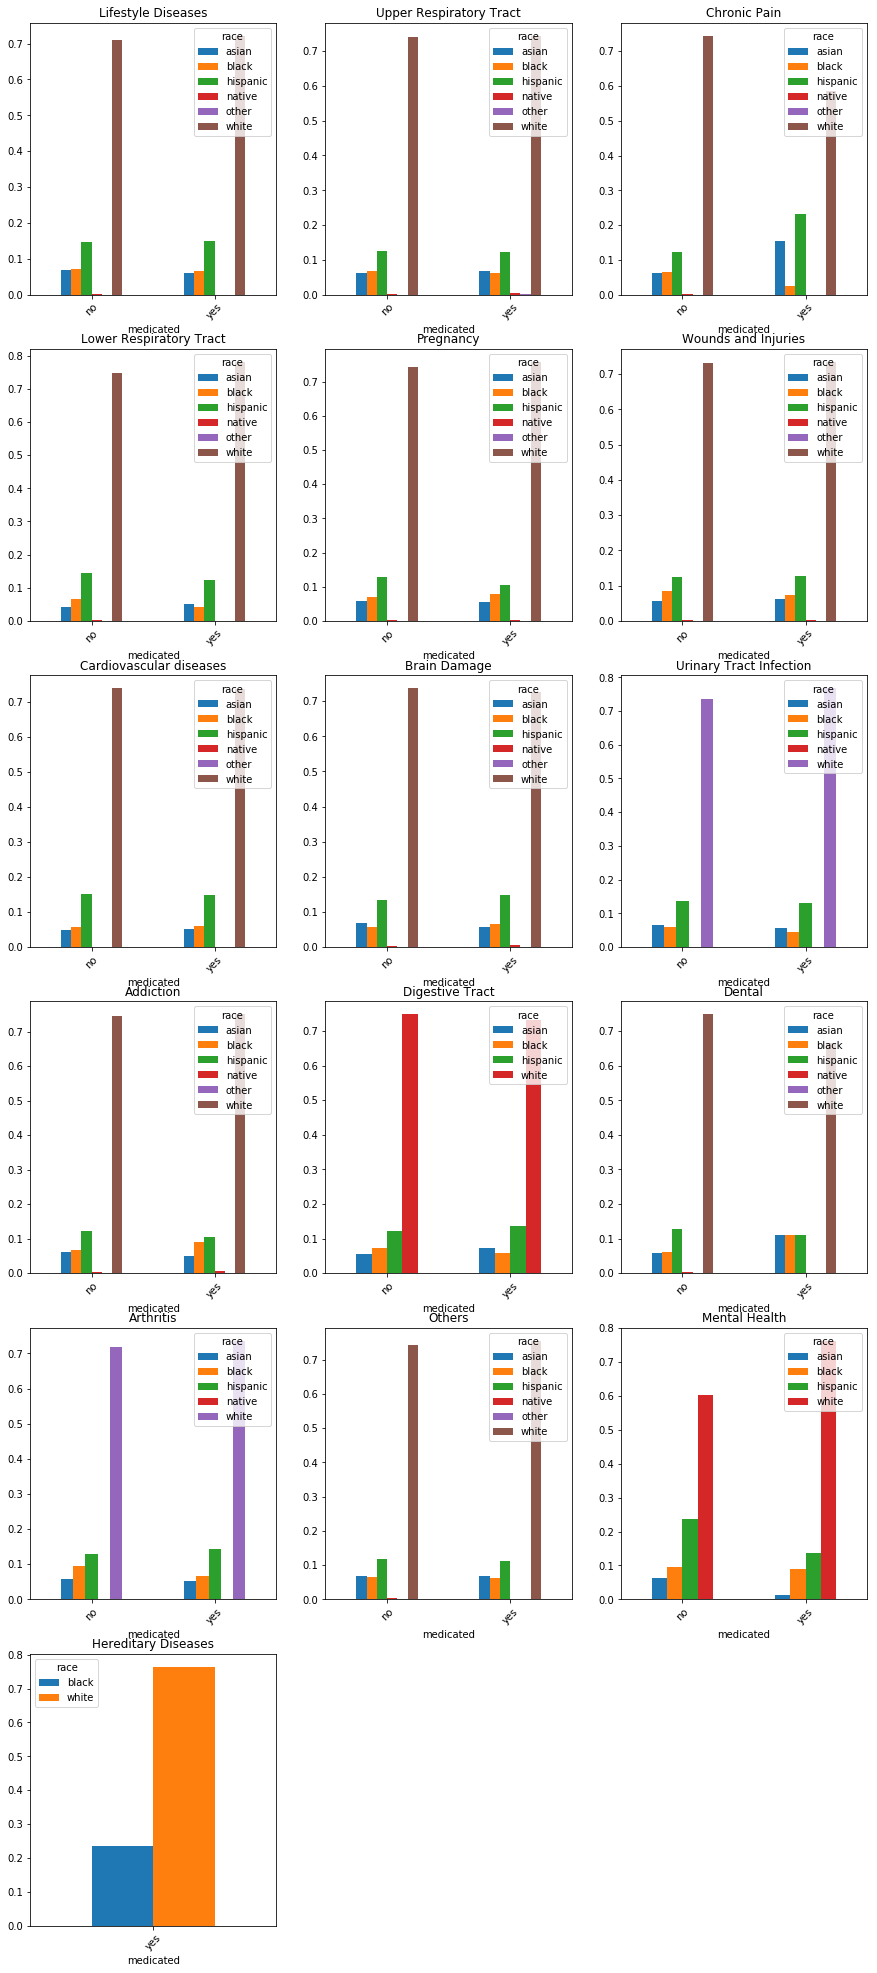

In [153]:
fig,ax = plt.subplots(6,3,figsize = (15,35))
ax = [y for x in ax for y in x]
fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
for i in range(len(all_categories)):
    data = treatment_w_groups.loc[treatment_w_groups.condition_category == all_categories[i]]
    pd.crosstab(data.medicated,data.race,normalize = 'index').plot(kind = 'bar',ax =ax[i])
    #counts = data.medicated.value_counts(normalize = True).sort_index()
    #sns.barplot(x = counts.index,y=counts.values,ax = ax[i])
    ax[i].set_title(all_categories[i])
    
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()
    

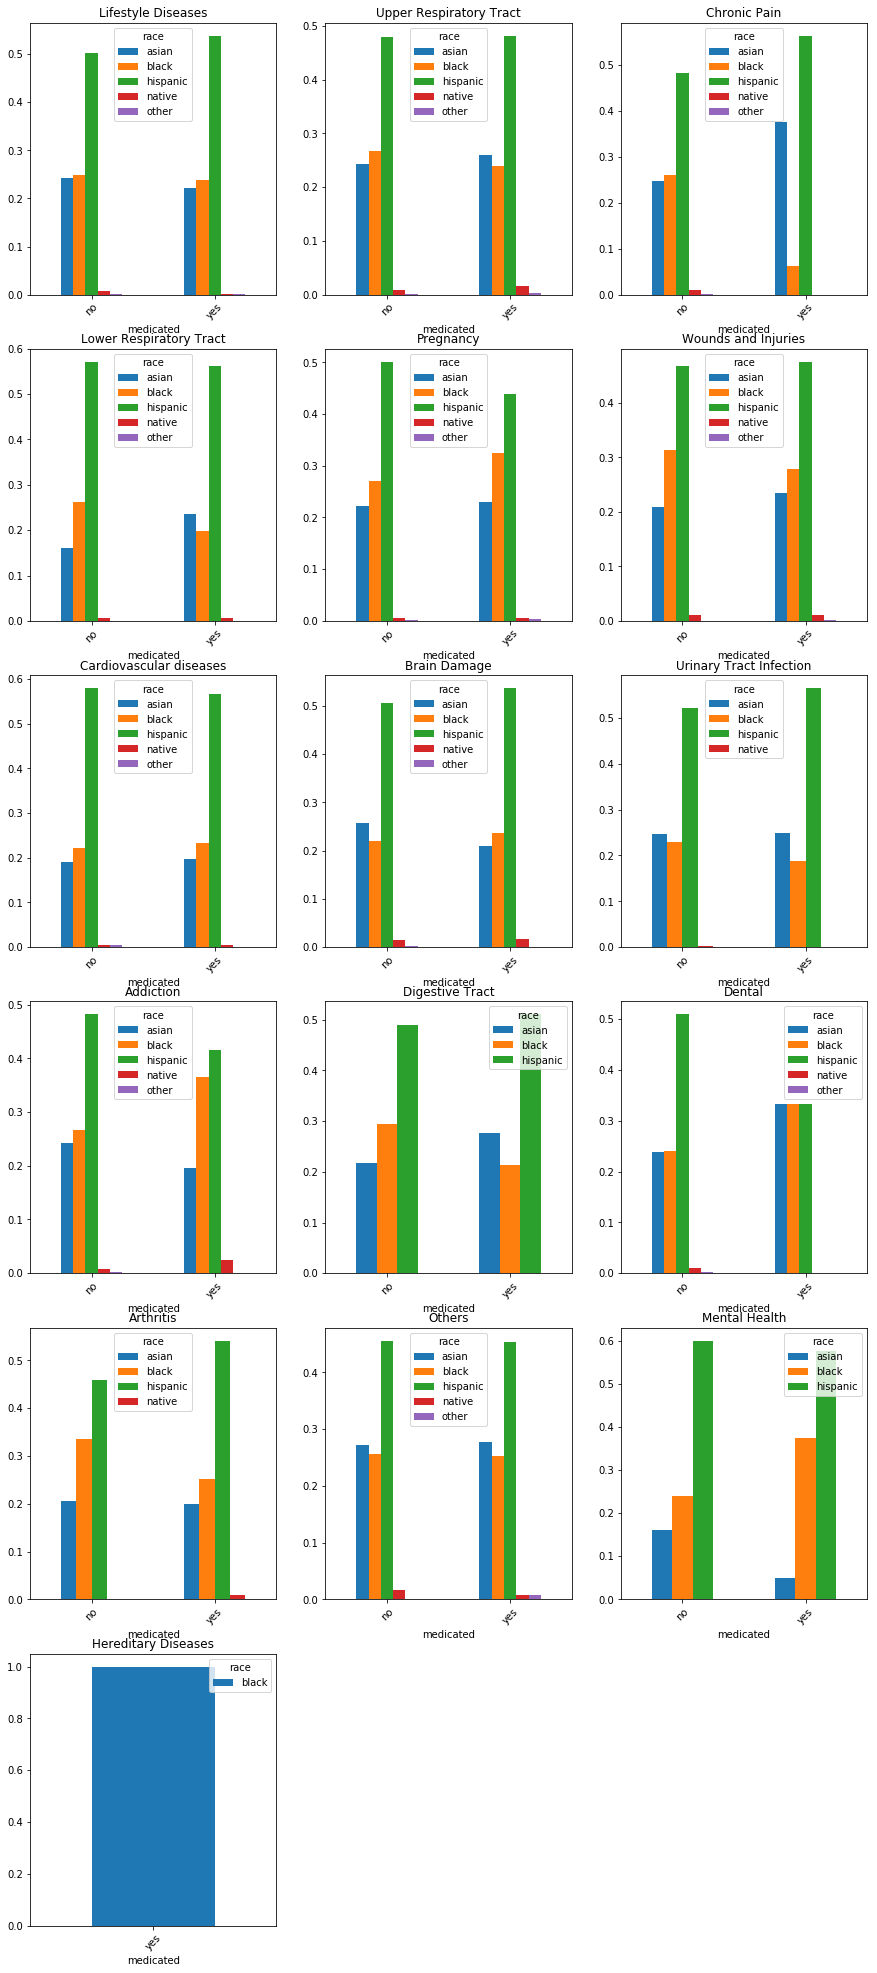

In [154]:
#its very hard to understand the difference in other groups due to the white population, let filter them out.
fig,ax = plt.subplots(6,3,figsize = (15,35))
ax = [y for x in ax for y in x]
fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
for i in range(len(all_categories)):
    data = treatment_w_groups.loc[(treatment_w_groups.condition_category == all_categories[i]) & (treatment_w_groups.race != 'white')]
    pd.crosstab(data.medicated,data.race,normalize = 'index').plot(kind = 'bar',ax =ax[i])
    #counts = data.medicated.value_counts(normalize = True).sort_index()
    #sns.barplot(x = counts.index,y=counts.values,ax = ax[i])
    ax[i].set_title(all_categories[i])
    
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()
    

#### Few observations:

- Among the black population, patients suffering from chronic and Arthritis have more un-medicated patients. 
- And, among the Hispanic population, patients with Dental & Addiction issues have a higher un-medicated population.
- White population also has quite a few un-medicated patients.

As we see, access to medication doesn't seem to be in any relation with a particular group, we can refute our hypothesis that people might not have access to healthcare, or a certain section might not have access and therefore, is more prone to dying.


In [214]:
immunizations = pd.read_csv('immunizations.csv')
immunizations.columns = [i.lower() for i in immunizations]
immunizations.info()
immunizations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181900 entries, 0 to 181899
Data columns (total 5 columns):
date           181900 non-null object
patient        181900 non-null object
encounter      181900 non-null object
code           181900 non-null int64
description    181900 non-null object
dtypes: int64(1), object(4)
memory usage: 6.9+ MB


,date,patient,encounter,code,description
0,2013-02-10,c0d528b6-cdae-4d98-8936-a270f8827eb7,1ef67c37-7306-4be4-9668-a93f34972544,8,Hep B adolescent or pediatric
1,2013-03-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,158ced22-0023-4934-b046-451696f2d516,8,Hep B adolescent or pediatric
2,2013-05-19,c0d528b6-cdae-4d98-8936-a270f8827eb7,3980f194-389d-42f5-b477-f7c99598d6be,49,Hib (PRP-OMP)
3,2013-05-19,c0d528b6-cdae-4d98-8936-a270f8827eb7,3980f194-389d-42f5-b477-f7c99598d6be,119,rotavirus monovalent
4,2013-05-19,c0d528b6-cdae-4d98-8936-a270f8827eb7,3980f194-389d-42f5-b477-f7c99598d6be,10,IPV


In [215]:
immu_w_groups = pd.merge(immunizations,patients[['id','race','ethnicity']],how = 'left',left_on = 'patient',right_on = 'id')

In [228]:
pd.crosstab(immu_w_groups.race,immu_w_groups.description,normalize = 'columns')*100

description,DTaP,HPV quadrivalent,Hep A adult,Hep A ped/adol 2 dose,Hep B adolescent or pediatric,Hep B adult,Hib (PRP-OMP),IPV,Influenza seasonal injectable preservative free,MMR,Pneumococcal conjugate PCV 13,Td (adult) preservative free,Tdap,meningococcal MCV4P,pneumococcal polysaccharide vaccine 23 valent,rotavirus monovalent,varicella,zoster
race,,,,,,,,,,,,,,,,,,
asian,5.508475,6.250000,7.242340,5.492270,5.467326,5.885214,5.485773,5.706619,6.174178,5.746706,4.394263,6.211180,6.096528,6.185567,5.756149,5.463310,5.551331,6.674757
black,7.480443,8.268229,6.344785,7.526444,7.003385,8.025292,7.075109,7.549195,6.928188,7.833089,6.957583,6.502329,8.128704,8.018328,6.488749,7.873594,7.642586,6.027508
hispanic,10.022816,11.425781,10.956360,10.089504,10.492059,12.840467,10.407588,10.322004,12.664580,10.285505,9.185230,12.140916,11.600339,12.600229,13.605442,9.480450,10.380228,10.679612
native,0.537810,0.520833,0.309502,0.528885,0.520698,0.145914,0.512689,0.483005,0.243123,0.475842,0.671346,0.213509,0.592718,0.429553,0.052329,0.642742,0.494297,0.444984
other,0.162973,0.000000,0.061900,0.162734,0.234314,0.048638,0.230710,0.214669,0.032854,0.219619,0.244126,0.038820,0.000000,0.000000,0.000000,0.214247,0.190114,0.080906
white,76.287484,73.535156,75.085113,76.200163,76.282218,73.054475,76.288131,75.724508,73.957076,75.439239,78.547452,74.893245,73.581710,72.766323,74.097331,76.325656,75.741445,76.092233


In [229]:
immu_w_groups.race.value_counts(normalize = True)

white       0.744354
hispanic    0.121061
black       0.070253
asian       0.060649
native      0.003046
other       0.000638
Name: race, dtype: float64

In [222]:
df = immu_w_groups.loc[immu_w_groups.race != 'white']
pd.crosstab(df.race,df.description,normalize = 'columns')*100

description,DTaP,HPV quadrivalent,Hep A adult,Hep A ped/adol 2 dose,Hep B adolescent or pediatric,Hep B adult,Hib (PRP-OMP),IPV,Influenza seasonal injectable preservative free,MMR,Pneumococcal conjugate PCV 13,Td (adult) preservative free,Tdap,meningococcal MCV4P,pneumococcal polysaccharide vaccine 23 valent,rotavirus monovalent,varicella,zoster
race,,,,,,,,,,,,,,,,,,
asian,23.230241,23.616236,29.068323,23.076923,23.051592,21.841155,23.135135,23.507738,23.707699,23.397914,20.483642,24.739080,23.076923,22.712934,22.222222,23.076923,22.884013,27.918782
black,31.546392,31.242312,25.465839,31.623932,29.527991,29.783394,29.837838,31.098010,26.602958,31.892697,32.432432,25.898724,30.769231,29.442692,25.050505,33.257919,31.504702,25.211506
hispanic,42.268041,43.173432,43.975155,42.393162,44.237102,47.653430,43.891892,42.520265,48.629640,41.877794,42.816501,48.357170,43.910256,46.267087,52.525253,40.045249,42.789969,44.670051
native,2.268041,1.968020,1.242236,2.222222,2.195390,0.541516,2.162162,1.989683,0.933548,1.937407,3.129445,0.850406,2.243590,1.577287,0.202020,2.714932,2.037618,1.861252
other,0.687285,0.000000,0.248447,0.683761,0.987925,0.180505,0.972973,0.884304,0.126155,0.894188,1.137980,0.154619,0.000000,0.000000,0.000000,0.904977,0.783699,0.338409


In [230]:
df.race.value_counts(normalize = True)

hispanic    0.473550
black       0.274805
asian       0.237237
native      0.011913
other       0.002495
Name: race, dtype: float64

Nothing seems out of place here. This concludes our analysis on the Massandapoleans.

### Things to take away:

- Initially, we saw the population size decreasing in Massandapolis since 1990s, and observed very high mortality rates since 1990s. 
- Another thing we observed was irish population was largely unaffected by this decrease.
- Then we analyzed different conditions, and observed Addiction issues plaguing the state all through 1990s, and that saw quite a rise in Dental and Chronic Pain problems affecting the population.
- When analyzing individual health of people, we observed Massandapoleans to be very unhealthy. Throughout decades, we saw obesity issues, with people weighing heavy and having high BMIs and high blood pressures. 
- Being obese, also brings a lot of other health problems, like we saw with high cholestrol (bad cholestrol) levels and high creatinine and chloride levels in individuals.
- I also hypothesized that lack of medical facilities and care could be one of the factors affecting health, and rising mortality rates, but the data suggested otherwise. The data available did not indicate any relation towards different sections of society lacking in medical care.
- With more clarity on the relationships between conditions and the medications, I would have liked to investigate medical care and treatments in greater detail, but unfortunately, I could not do that, as this is the only information and data I have available.

--- Until next analysis, addios!